# Reading data

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

In [117]:
data = pd.read_csv("../data/Emotion_Data_v2.csv")

In [118]:
emotions = {'neutral': 0,
            'calm': 1,
            'happy': 2, 
            'sad': 3, 
            'angry': 4, 
            'fearful': 5, 
            'disgust': 6,
            'surprised': 7, 
            'boredom': 8}
data["Emotion"] = data["Emotion"].map(emotions)
names = data["File Name"]
data = data.drop("File Name", axis = 1)
data

,Emotion,Chroma Standard Deviation,Croma Mean,MEL Standard Deviation,MEL Mean,Spectral Centroid Feature,MFCC Standard Deviation,MFCC Mean,MFCC 1st Derivative,MFCC 2nd Derivative,Root Mean Square Mean,Spectral Rolloff Mean,Spectral Rolloff Range,Zero Crossing Rate
0,2,0.251560,0.611641,10.345727,1.482626,1851.787049,95.586288,-14.091299,0.045822,-0.102562,0.064489,327.987448,2691.650391,327.987448
1,0,0.235453,0.638080,23.354847,3.512083,1386.832519,96.253471,-9.005164,-0.040387,-0.095998,0.099006,277.470703,2777.783203,277.470703
2,4,0.244518,0.609958,23.899830,3.042638,2138.843511,83.991272,-17.577866,0.127689,-0.089570,0.101291,481.971571,2670.117188,481.971571
3,2,0.284806,0.528645,33.872307,3.438237,2073.102010,84.644112,-17.824776,-0.116098,-0.096451,0.098398,306.538759,2002.587891,306.538759
4,0,0.224481,0.658214,39.342068,5.511982,1481.499672,91.639870,-8.317816,-0.101314,-0.093935,0.126057,169.360352,1668.823242,169.360352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9891,7,0.332678,0.575813,0.364735,0.036160,2347.294889,167.522430,-51.517506,0.000119,-0.000630,0.007563,457.910156,4188.208008,457.910156
9892,7,0.325352,0.600506,0.889120,0.086041,2271.545838,156.242050,-45.163898,-0.000215,-0.000014,0.011557,429.840734,1733.422852,429.840734
9893,7,0.336933,0.577079,0.594145,0.058880,2275.967828,158.319168,-46.462028,-0.000471,-0.000133,0.009970,430.476273,1485.791016,430.476273
9894,7,0.310050,0.576939,0.937817,0.086885,2393.131729,147.918533,-40.915497,-0.001676,0.001688,0.013326,592.366229,6018.530273,592.366229


In [119]:
y = data["Emotion"]
data = data.drop("Emotion", axis = 1)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.3)

In [140]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6927, 13), (2969, 13), (6927,), (2969,))

#### Judging by the TSNE Random Forest and Logistic Regression may work nice. Also, let's check KNN

## KNN

In [125]:
knn = KNeighborsClassifier(n_neighbors = 103, n_jobs = -1)
# params = {
#     "n_neighbors": np.arange(15, 151, 2)
# }
# knn = GridSearchCV(knn, params, n_jobs = -1, verbose = 3)

In [126]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=103, p=2,
                     weights='uniform')

In [129]:
# knn.best_params_

In [128]:
accuracy_score(knn.predict(X_test), y_test)

0.3241505968778696

##### Not bad for KNN, but think that other models will work better

## Random Forest

In [141]:
rf = RandomForestClassifier(n_estimators = 201, oob_score = True, n_jobs = -1, random_state = 11, \
                            max_depth = 15, verbose = 3)
# params = {
#     "n_estimators": [101, 201, 301],
#     "max_depth": np.arange(12, 20),
#     "min_samples_split": np.arange(5, 9)
#     "min_samples_leaf": np.arange(3, 7),
# }
# 
# rf = GridSearchCV(rf, params, n_jobs = -1, verbose = 3)

In [142]:
cross_val_score(rf, X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 186 out of 201 | elapsed:    2.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 201 out of 201 | elapsed:    2.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 201 out of 201 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 186 out of 201 | elapsed:    2.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 201 out of 201 | elapsed:    2.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.1s
[Parall

array([0.41774892, 0.42640693, 0.43176895, 0.40866426, 0.42599278])

In [143]:
rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 201building tree 2 of 201

building tree 3 of 201building tree 4 of 201building tree 5 of 201building tree 6 of 201building tree 7 of 201




building tree 8 of 201
building tree 9 of 201
building tree 10 of 201building tree 11 of 201
building tree 12 of 201
building tree 13 of 201
building tree 14 of 201
building tree 15 of 201

building tree 16 of 201
building tree 17 of 201
building tree 18 of 201building tree 19 of 201

building tree 20 of 201
building tree 21 of 201
building tree 22 of 201
building tree 23 of 201
building tree 24 of 201
building tree 25 of 201

[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.4s



building tree 26 of 201
building tree 27 of 201building tree 28 of 201building tree 29 of 201


building tree 30 of 201
building tree 31 of 201building tree 32 of 201

building tree 33 of 201
building tree 34 of 201building tree 35 of 201

building tree 36 of 201building tree 37 of 201

building tree 38 of 201
building tree 39 of 201
building tree 40 of 201
building tree 41 of 201
building tree 42 of 201
building tree 43 of 201building tree 44 of 201

building tree 45 of 201
building tree 46 of 201building tree 47 of 201building tree 48 of 201


building tree 49 of 201
building tree 50 of 201
building tree 51 of 201building tree 52 of 201building tree 53 of 201


building tree 54 of 201
building tree 55 of 201building tree 56 of 201

building tree 57 of 201
building tree 58 of 201
building tree 59 of 201
building tree 60 of 201
building tree 61 of 201building tree 62 of 201building tree 63 of 201


building tree 64 of 201
building tree 65 of 201building tree 66 of 201
building tree 67

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    1.9s



building tree 122 of 201
building tree 123 of 201building tree 124 of 201building tree 125 of 201
building tree 126 of 201
building tree 127 of 201


building tree 128 of 201
building tree 129 of 201
building tree 130 of 201
building tree 131 of 201
building tree 132 of 201
building tree 133 of 201
building tree 134 of 201
building tree 135 of 201
building tree 136 of 201
building tree 137 of 201
building tree 138 of 201
building tree 139 of 201
building tree 140 of 201
building tree 141 of 201building tree 142 of 201building tree 143 of 201


building tree 144 of 201
building tree 145 of 201
building tree 146 of 201building tree 147 of 201

building tree 148 of 201building tree 149 of 201

building tree 150 of 201
building tree 151 of 201
building tree 152 of 201
building tree 153 of 201
building tree 154 of 201
building tree 155 of 201
building tree 156 of 201
building tree 157 of 201building tree 158 of 201building tree 159 of 201


building tree 160 of 201
building tree 161 of 201

[Parallel(n_jobs=-1)]: Done 201 out of 201 | elapsed:    3.0s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=201,
                       n_jobs=-1, oob_score=True, random_state=11, verbose=3,
                       warm_start=False)

In [144]:
np.arange(5, 12)

array([ 5,  6,  7,  8,  9, 10, 11])

In [145]:
# rf.best_params_

In [146]:
accuracy_score(rf.predict(X_test), y_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 201 out of 201 | elapsed:    0.3s finished


0.44392051195688786

In [147]:
coefs = pd.DataFrame({"feature": X_train.columns,
             "coef": rf.feature_importances_}).sort_values(by = "coef", ascending = False)
coefs

,feature,coef
3,MEL Mean,0.094579
6,MFCC Mean,0.089028
5,MFCC Standard Deviation,0.086904
9,Root Mean Square Mean,0.085434
2,MEL Standard Deviation,0.079755
11,Spectral Rolloff Range,0.076172
12,Zero Crossing Rate,0.076038
10,Spectral Rolloff Mean,0.074537
0,Chroma Standard Deviation,0.074506
4,Spectral Centroid Feature,0.070493


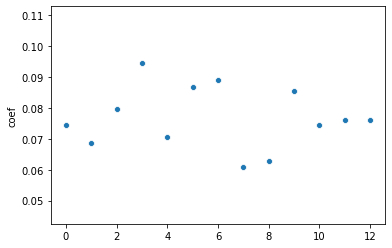

In [148]:
sns.scatterplot(x = coefs.index, y = coefs["coef"]);

##### We see kinda uniform distribution, but all coefs are near to 0. That's nice, but accuracy is not the best

## Logistic Regression without scaling

In [149]:
logit = LogisticRegressionCV(Cs = [10, 5, 1, 0.1, 0.01, 0.001], class_weight = "balanced", \
                             random_state = 11, verbose = 3, n_jobs = -1)

In [150]:
logit.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.0s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.1s finished
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegressionCV(Cs=[10, 5, 1, 0.1, 0.01, 0.001], class_weight='balanced',
                     cv=None, dual=False, fit_intercept=True,
                     intercept_scaling=1.0, l1_ratios=None, max_iter=100,
                     multi_class='auto', n_jobs=-1, penalty='l2',
                     random_state=11, refit=True, scoring=None, solver='lbfgs',
                     tol=0.0001, verbose=3)

In [151]:
logit.C_

array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001])

In [152]:
accuracy_score(logit.predict(X_test), y_test)

0.340518693162681

In [153]:
coefs = pd.DataFrame({"feature": X_train.columns,
             "coef": logit.coef_[0]}).sort_values(by = "coef", ascending = False)
coefs

,feature,coef
6,MFCC Mean,0.069000
5,MFCC Standard Deviation,0.031321
3,MEL Mean,0.001679
1,Croma Mean,0.000923
0,Chroma Standard Deviation,0.000567
9,Root Mean Square Mean,0.000184
11,Spectral Rolloff Range,0.000141
7,MFCC 1st Derivative,-0.000046
8,MFCC 2nd Derivative,-0.000157
10,Spectral Rolloff Mean,-0.000452


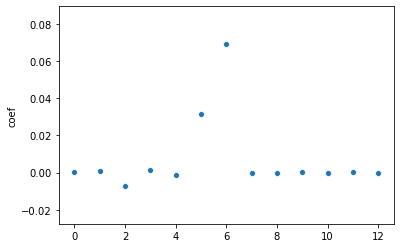

In [154]:
sns.scatterplot(x = coefs.index, y = coefs["coef"]);

##### 0s. Need to use scaling

## Logistic Regression with scaling

In [155]:
from sklearn.preprocessing import StandardScaler

In [156]:
# logit = LogisticRegressionCV(class_weight = "balanced", random_state = 11, verbose = 3, n_jobs = -1)
# params = {
#     "C": [10, 5, 1, 0.1, 0.01, 0.001]
# }
# logit = GridSearchCV(logit, params, n_jobs = -1, verbose = 3)

In [157]:
logit = LogisticRegressionCV(Cs = [10, 5, 1, 0.1, 0.01, 0.001], class_weight = "balanced", \
                             random_state = 11, verbose = 3, n_jobs = -1)
logit.fit(StandardScaler().fit_transform(X_train), y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.2s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.3s finished
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegressionCV(Cs=[10, 5, 1, 0.1, 0.01, 0.001], class_weight='balanced',
                     cv=None, dual=False, fit_intercept=True,
                     intercept_scaling=1.0, l1_ratios=None, max_iter=100,
                     multi_class='auto', n_jobs=-1, penalty='l2',
                     random_state=11, refit=True, scoring=None, solver='lbfgs',
                     tol=0.0001, verbose=3)

In [158]:
accuracy_score(logit.predict(StandardScaler().fit_transform(X_test)), y_test)

0.3647692825867295

In [159]:
coefs = pd.DataFrame({"feature": X_train.columns,
             "coef": logit.coef_[0]}).sort_values(by = "coef", ascending = False)
coefs

,feature,coef
5,MFCC Standard Deviation,1.684174
9,Root Mean Square Mean,1.255663
6,MFCC Mean,1.242924
11,Spectral Rolloff Range,0.237449
3,MEL Mean,0.068699
4,Spectral Centroid Feature,0.029546
7,MFCC 1st Derivative,-0.032668
0,Chroma Standard Deviation,-0.071828
8,MFCC 2nd Derivative,-0.147165
10,Spectral Rolloff Mean,-0.175163


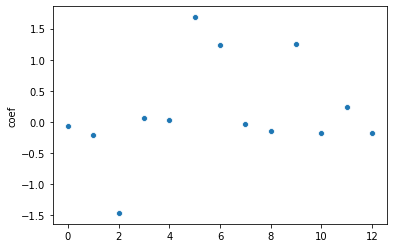

In [160]:
sns.scatterplot(x = coefs.index, y = coefs["coef"]);

##### Basically, I didn't expect Logistic Regression to work so much worse with scaling

# MLP

In [161]:
net = MLPClassifier(hidden_layer_sizes = tuple([50] * 10), alpha = 0.01, learning_rate = "constant", \
                    random_state = 11, verbose = 10)
params = {
    "alpha": [0.0001, 0.001, 0.01, 0.1, 1]
}

net = GridSearchCV(net, params, n_jobs = -1, verbose = 10)

In [162]:
net.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  13 out of  25 | elapsed:  1.7min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  16 out of  25 | elapsed:  1.8min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  2.2min remaining:   41.7s
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:  2.6min remaining:   21.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.7min finished


Iteration 1, loss = 2.75771960
Iteration 2, loss = 1.79440126
Iteration 3, loss = 1.70613476
Iteration 4, loss = 1.70239582
Iteration 5, loss = 1.68306797
Iteration 6, loss = 1.67194479
Iteration 7, loss = 1.67062299
Iteration 8, loss = 1.65475701
Iteration 9, loss = 1.65070507
Iteration 10, loss = 1.64533353
Iteration 11, loss = 1.64694805
Iteration 12, loss = 1.62943669
Iteration 13, loss = 1.63918642
Iteration 14, loss = 1.63682132
Iteration 15, loss = 1.63506852
Iteration 16, loss = 1.62255716
Iteration 17, loss = 1.62480155
Iteration 18, loss = 1.62318260
Iteration 19, loss = 1.61744796
Iteration 20, loss = 1.61840823
Iteration 21, loss = 1.61855933
Iteration 22, loss = 1.60280269
Iteration 23, loss = 1.60832028
Iteration 24, loss = 1.59528845
Iteration 25, loss = 1.59113233
Iteration 26, loss = 1.58175779
Iteration 27, loss = 1.58282638
Iteration 28, loss = 1.59686970
Iteration 29, loss = 1.58844442
Iteration 30, loss = 1.58153614
Iteration 31, loss = 1.57403369
Iteration 32, los

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.01,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08,
                                     hidden_layer_sizes=(50, 50, 50, 50, 50, 50,
                                                         50, 50, 50, 50),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=11, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=10,


In [164]:
accuracy_score(net.predict(X_test), y_test)

0.3866621758167733

In [166]:
pd.DataFrame({"feature": X_train.columns,
             "coef": np.mean(net.best_estimator_.coefs_[0])})

,feature,coef
0,Chroma Standard Deviation,-0.022004
1,Croma Mean,-0.022004
2,MEL Standard Deviation,-0.022004
3,MEL Mean,-0.022004
4,Spectral Centroid Feature,-0.022004
5,MFCC Standard Deviation,-0.022004
6,MFCC Mean,-0.022004
7,MFCC 1st Derivative,-0.022004
8,MFCC 2nd Derivative,-0.022004
9,Root Mean Square Mean,-0.022004
